<a href="https://colab.research.google.com/github/drvoss/Colab-Notebooks/blob/master/hand_writing_seperation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0.9476905954368392

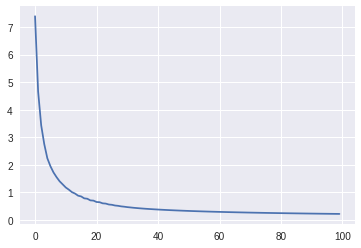

In [12]:
import torch
from sklearn.datasets import load_digits
from torch import nn, optim

digits = load_digits()
X = digits.data
y = digits.target
X = torch.tensor(X, dtype=torch.float32)
# CrossEntropyLoss 함수는 y로 int64형의 텐서를 받으니 주의하자
y = torch.tensor(y, dtype=torch.int64)
# 출력은 10(분류 수) 차원
net = nn.Linear(X.size()[1], 10)
# 소프트맥스 크로스 엔트로피
loss_fn = nn.CrossEntropyLoss()
# SGD
optimizer = optim.SGD(net.parameters(), lr=0.01)

# 손실 함수 로그
losses = []
# 100회 반복
for epoc in range(100):
  # 전회의 backward 메서드로 계산된 경사값을 초기화
  optimizer.zero_grad()
  # 선형 모델으로 y 예측값을 계산
  y_pred = net(X)
  # MSE loss 미분 계산
  loss = loss_fn(y_pred, y)
  loss.backward()
  # 경사를 갱신한다
  optimizer.step()
  # 수렴 확인을 위한 loss를 기록해 둔다
  losses.append(loss.item())
  
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(losses)

# torch.max눈 집계축을 지정하면 최댓값뿐만 아니라 그 위치도 반환한다
_, y_pred = torch.max(net(X), 1)
# 정답률을 계산한다
(y_pred == y).sum().item() / len(y)